# Requirements
#### If you have not performed the installations instruction in our `README.md`, you need to do so now. In order to run this Tutorial you need to have completed the following steps:

### 1.  Initial platform-independent (macOs, Windows, Linux) steps:
- clone this repo (probably you have done this, otherwise you wouldn't be in this notebook):
    ```bash
    git clone https://github.com/jan-forest/autoencodix.git
    ```
- change into the repo:
    ```bash
    cd autoencodix
    ```
###  2. platform-specific (maxOs, Windows) steps:
- Use the platform-specific Makefile (if you are not on Linux or WSL) with:
- **macOS**: Overwrite `Makefile` with `Makefile_macos`:
    ```bash
    cp Makefile_macos Makefile
    ```
- **Windows**: Overwrite `Makefile` with `Makefile_windows`:
    ```bash
    cp Makefile_windows Makefile
    ```

### 3. Remaining platform-independent steps:
- performed the installation instruction in the README.md. See following points for reference:

- Create environment with:
    ```bash
    make create_environment
    ```

- activate environment with:
    ```bash
    source venv-gallia/bin/activate
    ```

- install requirements with:
    ```bash
    make requirements
    ```

# Information:
#### You don't need to download any data or configuration files to run this Tutorial. The GitHub repository comes with the data for this `Getting-Started` Notebook.


# Getting Started
#### In this notebook we will get familiar with the Autoencodix Framework. We will learn a shared embedding of proteomics and image data with our `X-Modalix` model. Therefore we use a dataset that contains transcription factor (TF) expression measurements paired with fluorescence microscopy images from C. elegans embryonic development (Ma et al., 2021). In this tutorial, we'll implement a cross-modal autoencoder to translate between numerical TF expression profiles and their corresponding visual protein localization patterns in developing embryos.



### Execute the Python code below to see the workflow of this tutorial


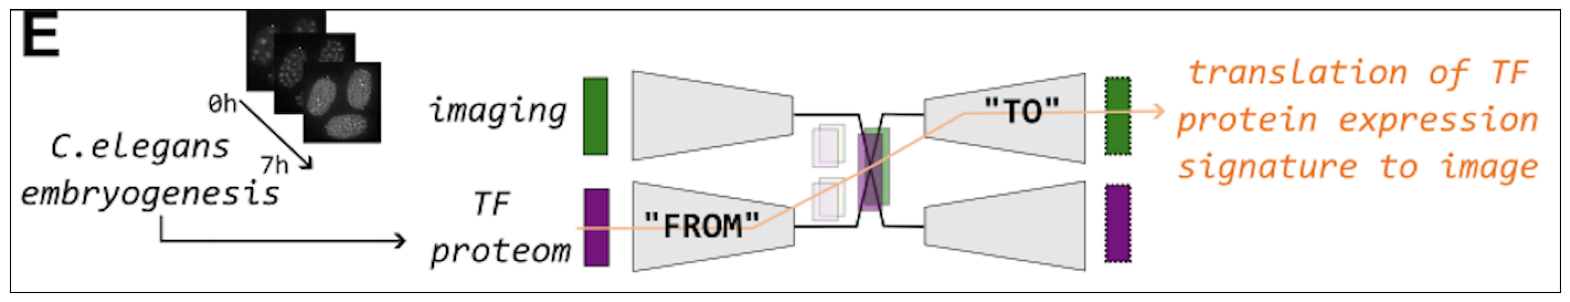

In [1]:
import matplotlib.pyplot as plt
import cv2
import os
imgpath = os.path.join("TutorialData/xmodal.png")
img = cv2.imread(imgpath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

## Plan of action:
#### 1. Setup notebook & load datasets and config files
#### 2. Prepare & visualize input data
#### 3. Run our autoencodix pipeline
#### 4. Visualize and evaluate the results
#### 5. Show how to customize the pipeline

## Start of Tutorial
### 1 Setup notebook & load data and config files
Firstly, we need to ensure we work in the correct directory. This is the root of our GitHub repo that you've cloned before.

When you changed nothing, you should be in the directory of the Tutorials now. This is great, we will change this to root of the autoencodix repository later, you don't have to do anything.


We use the following Python code to check the current working directory. If the output the following cell neds with `autoencodix/Tutorials`, you need to take **NO** action. Otherwise use `os.chdir(<path-to-autoencodix/Tutorials>)` to change to the correct working directory.
- Please execute the cell below

In [2]:
import os
cur_dir = os.getcwd()
print(f"Current working directory: {cur_dir}")
if not cur_dir.endswith("autoencodix/Tutorials"):
    print("-----------------------------------------")
    print("ATTENTION - ATTENTION - ATTENTION")
    print("----------------------------------------")
    print("The current working directory is not 'autoencodix/Tutorials'.")
    print("Please run this script from the 'autoencodix/Tutorials' directory.")
os.chdir("..")

Current working directory: /Users/maximilianjoas/development/autoencodix/Tutorials


#### Great, we verified the directory, now load the config file:

In [3]:
import yaml

CFG_PATH = os.path.join("Tutorials/TutorialData/getting_started_config.yaml")
CFG = yaml.safe_load(open(CFG_PATH, "r"))
print(f"Configuration loaded from {CFG_PATH}")

Configuration loaded from Tutorials/TutorialData/getting_started_config.yaml


##### **Information**: For this Tutorial, we defined a `RUN_ID`. The `RUN_ID` we chose is `getting_started`. The config naming definition is <RUN_ID>_config.yaml

##### The config stores information about the data locations, training parameters (epochs, dropout, etc.) and data processing (scaling, filtering, etc). For this Tutorial we use the pre-defined config and don't make any changes. More advanced Tutorials will show how to do this

In [4]:
print(f"We will use the following scaling method for our proteomics data:\n \n {CFG['DATA_TYPE']['PROTEOMICS']['SCALING']}")

We will use the following scaling method for our proteomics data:
 
 MinMax


### 2. Prepare & visualize input data
#### Now we are ready to run the first step of our `AUTOENCODIX` pipeline. The `make data` step. This step will:
##### a) Split the data into Train/Valid/Test
##### b) Scale and Filter the data.
##### c) Match the samples of the two datasets


##### extra) The Python command is equivalent to the bash command `make data RUN_ID=getting_started`

In [5]:
import subprocess
import shutil
shutil.copyfile(CFG_PATH, "getting_started_config.yaml")
output_make_data = subprocess.run(["make", "data", "RUN_ID=getting_started"], 
                        capture_output=True, 
                        text=True)
print(output_make_data.stdout[-10:-1])

done data


#### Verifying that `make data` worked

In [6]:
print("Verifying the data files...")
print(os.listdir(os.path.join("data/processed/getting_started")))
print(len(os.listdir(os.path.join("data/processed/getting_started"))))
assert len(os.listdir(os.path.join("data/processed/getting_started"))) == 264, "Data files are not present in the expected directory."

Verifying the data files...
['ALY-2_SYS721_t32.tif', 'ALY-2_SYS721_t114.tif', 'ALY-2_SYS721_t100.tif', 'ALY-2_SYS721_t26.tif', 'ALY-2_SYS721_t128.tif', 'ALY-2_SYS721_t129.tif', 'ALY-2_SYS721_t101.tif', 'ALY-2_SYS721_t27.tif', 'ALY-2_SYS721_t33.tif', 'ALY-2_SYS721_t115.tif', 'ALY-2_SYS721_t25.tif', 'ALY-2_SYS721_t103.tif', 'ALY-2_SYS721_t117.tif', 'ALY-2_SYS721_t31.tif', 'ALY-2_SYS721_t19.tif', 'ALY-2_SYS721_t249.tif', 'ALY-2_SYS721_t248.tif', 'ALY-2_SYS721_t260.tif', 'ALY-2_SYS721_t18.tif', 'ALY-2_SYS721_t116.tif', 'ALY-2_SYS721_t30.tif', 'ALY-2_SYS721_t24.tif', 'ALY-2_SYS721_t102.tif', 'ALY-2_SYS721_t106.tif', 'ALY-2_SYS721_t20.tif', 'ALY-2_SYS721_t34.tif', 'ALY-2_SYS721_t112.tif', 'ALY-2_SYS721_t258.tif', 'ALY-2_SYS721_t259.tif', 'ALY-2_SYS721_t35.tif', 'ALY-2_SYS721_t113.tif', 'ALY-2_SYS721_t107.tif', 'ALY-2_SYS721_t21.tif', 'ALY-2_SYS721_t139.tif', 'ALY-2_SYS721_t111.tif', 'ALY-2_SYS721_t37.tif', 'ALY-2_SYS721_t23.tif', 'ALY-2_SYS721_t105.tif', 'IMG_data.parquet', 'sample_split.par

#### Inspecting processed data
We have four files after our processing:
- `IMG_data.parquet`: maps sample_ids of proteomics data to image paths and image metadata (here `extra_class_labels` which corresponds to the timepoint the image was taken during embryogenesis)
- `sample_split.parquet`: maps sample_ids to a split (train/valid/test)
- `ANNO_data.parquet`: we don't have extra metadata for the proteomics data, so this file is identical with IMG_data.parquet
- `PROTEOMICS_data.parquet`: actual Transcriptions Factor (TF) expression levels (columns = TF, rows = timepoint during embryogenesis)



In [7]:
import pandas as pd
img_df = pd.read_parquet(os.path.join("data/processed/getting_started", "IMG_data.parquet"))
anno_df = pd.read_parquet(os.path.join("data/processed/getting_started", "ANNO_data.parquet"))
proteomics_df = pd.read_parquet(os.path.join("data/processed/getting_started", "PROTEOMICS_data.parquet"))
split_df = pd.read_parquet(os.path.join("data/processed/getting_started", "sample_split.parquet"))

print(f"Image data shape: {img_df.shape}")
print(f"Image data head:\n{img_df.head()}")
print(f"Image annotation data shape: {anno_df.shape}")

Image data shape: (260, 3)
Image data head:
                      img_paths  extra_class_labels early
sample_ids                                               
T_1         ALY-2_SYS721_t1.tif                   1   '1'
T_2         ALY-2_SYS721_t2.tif                   2   '1'
T_3         ALY-2_SYS721_t3.tif                   3   '1'
T_4         ALY-2_SYS721_t4.tif                   4   '1'
T_5         ALY-2_SYS721_t5.tif                   5   '1'
Image annotation data shape: (260, 3)


In [8]:
print(f"Proteomics data shape: {proteomics_df.shape}")
print(f"Proteomics data sample:\n{proteomics_df.iloc[0:5, 0:2]}")

Proteomics data shape: (260, 279)
Proteomics data sample:
     PROTEOMICS_AHA-1_SYS135  PROTEOMICS_AHR-1_SYS571
T_1                      0.0                      0.0
T_2                      0.0                      0.0
T_3                      0.0                      0.0
T_4                      0.0                      0.0
T_5                      0.0                      0.0


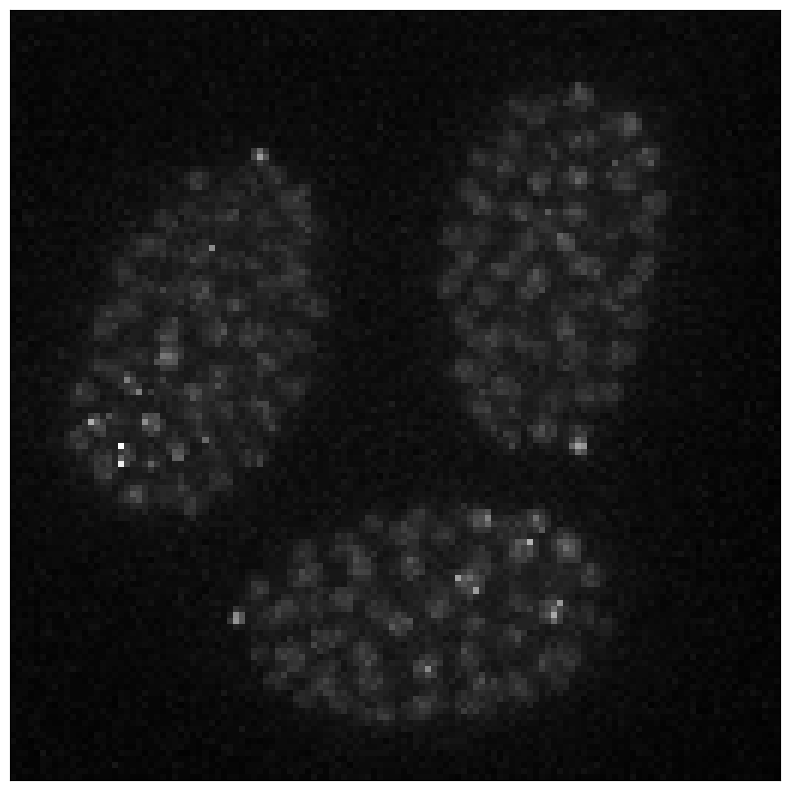

In [9]:
import tifffile
import os
import matplotlib.pyplot as plt

sample_img_path = os.path.join("data/processed/getting_started/ALY-2_SYS721_t101.tif")
sample_img = tifffile.imread(sample_img_path)

plt.figure(figsize=(10, 10))
plt.imshow(sample_img,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

### 3. Run our autoencodix pipeline
#### Here we will run two steps:
#### - `make model`
##### This will train our `X-Modalix` with the train dataset
#### - `make predict`
##### This will use the trained `X-Modalix` and generated embeddings and reconstructions on the test dataset

**Information 1:**

Note that in the code below we use `make model_only` and `make prediction_only`. The `_only` suffix indicates that we don't execute the steps before i.e., `make data`, because we've already done `make data`

**Information 2:**

The Python commands in the next to cells are equivalent to the bash commands: 

- `make model_only RUN_ID=getting_started`

- `make prediciton_only RUN_ID=getting_started`

In [10]:
# the following Python Command is equivalent to the bash command:
# make model_only RUN_ID=getting_started
output_make_model = subprocess.run(["make", "model_only", "RUN_ID=getting_started"], 
                        capture_output=True, 
                        text=True)
print(output_make_model.stdout[-20:-1])


Done training only


In [11]:
output_make_predict = subprocess.run(["make", "prediction_only", "RUN_ID=getting_started"], 
                        capture_output=True, 
                        text=True)
print(output_make_predict.stdout[-22:-1])


Done predicting only


#### Verifying that `make model` and `make prediction` worked:
##### Successful runs will create the `reports/<RUN_ID>` folder and populate the predicted latent space, loss files (for showing training and validation loss curves) and translated images.

In [12]:
import glob
print(os.listdir(os.path.join("reports/getting_started")))
# NOTE: we have also *.tif files for all the TFs in the IMGS folder, but we are only showing the *.png files here
print(glob.glob(os.path.join("reports/getting_started/IMGS/*.png")))

print(len(glob.glob(os.path.join("reports/getting_started/IMGS/*.png"))))
assert len(glob.glob(os.path.join("reports/getting_started/IMGS/*.png"))) == 8, "There should be 8 images in the IMGS folder"

['predicted_latent_space.parquet', 'IMGS', 'getting_started_config.yaml', 'losses_PROTEOMICS_to_IMG_x-modalix.parquet', 'figures', 'IMGS_IMG']
['reports/getting_started/IMGS/to_center_4thQ-extra_class_labels.png', 'reports/getting_started/IMGS/to_center_1stQ-extra_class_labels.png', 'reports/getting_started/IMGS/from_center_2ndQ-extra_class_labels.png', 'reports/getting_started/IMGS/from_center_4thQ-extra_class_labels.png', 'reports/getting_started/IMGS/from_center_1stQ-extra_class_labels.png', 'reports/getting_started/IMGS/to_center_2ndQ-extra_class_labels.png', 'reports/getting_started/IMGS/to_center_3rdQ-extra_class_labels.png', 'reports/getting_started/IMGS/from_center_3rdQ-extra_class_labels.png']
8


##### We could already check out our output files here, like the predicted latentspace, or predicted images, but for this Tutorial, we will use our built-in visualize step, to create even more meaningful visualization.

### 4. Visualize and evaluate the result
##### This step will populate the `reports/<RUN_ID>/figures` directory. The Python command in the cell below is equivalent to the bash command: `make visualize_only RUN_ID=getting_started`
##### We will show three plots from the figures directory and give a short explanation in this notebook.

In [13]:
output_make_visualize = subprocess.run(["make", "visualize_only", "RUN_ID=getting_started"], 
                        capture_output=True, 
                        text=True)
print(output_make_visualize.stdout[-22:-1])

Done visualizing only


#### Verifying that `make visualize` worked

In [ ]:
figure_base_path = os.path.join("reports/getting_started/figures")
print(len(os.listdir(figure_base_path)))
print(os.listdir(figure_base_path))
assert len(os.listdir(figure_base_path)) == 5, "There should be 5 figures in the figure base path"

5
['translategrid_extra_class_labels.png', 'loss_plot_relative.png', 'latent_dist_extra_class_labels.png', 'latent2D_Aligned_extra_class_labels.png', 'loss_plot_absolute.png']


### Important Note:
#### To make this Tutorial fast we only train fro 15 epochs, so the results are not as clear as in our publication.

#### Preparing the plots

In [15]:
import matplotlib.pyplot as plt
figure_base_path = os.path.join("reports/getting_started/figures")
loss_path = os.path.join(figure_base_path, "loss_plot_absolute.png")
translate_grid_path = os.path.join(figure_base_path, "translategrid_extra_class_labels.png")
latent_space_path = os.path.join(figure_base_path, "latent2D_Aligned_extra_class_labels.png")
loss_img = cv2.imread(loss_path)
loss_img = cv2.cvtColor(loss_img, cv2.COLOR_BGR2RGB)
translate_grid_img = cv2.imread(translate_grid_path)
translate_grid_img = cv2.cvtColor(translate_grid_img, cv2.COLOR_BGR2RGB)
latend_space_img = cv2.imread(latent_space_path)
latend_space_img = cv2.cvtColor(latend_space_img, cv2.COLOR_BGR2RGB)

#### Plot 1: Loss Plot
##### The next plot shows six subplots. The `X-Modalix` training is very sophisticated. Hence, we have six different losses, we optimize our model for. Each of the subplots shows one loss type. On the y-axis is the loss value, the x-axis show the epochs. Please refer to our publication or more advanced Tutorials to get more information about the meaning of each loss.

##### We switched of `class_loss` for this Tutorial, so we only have five loss plots.

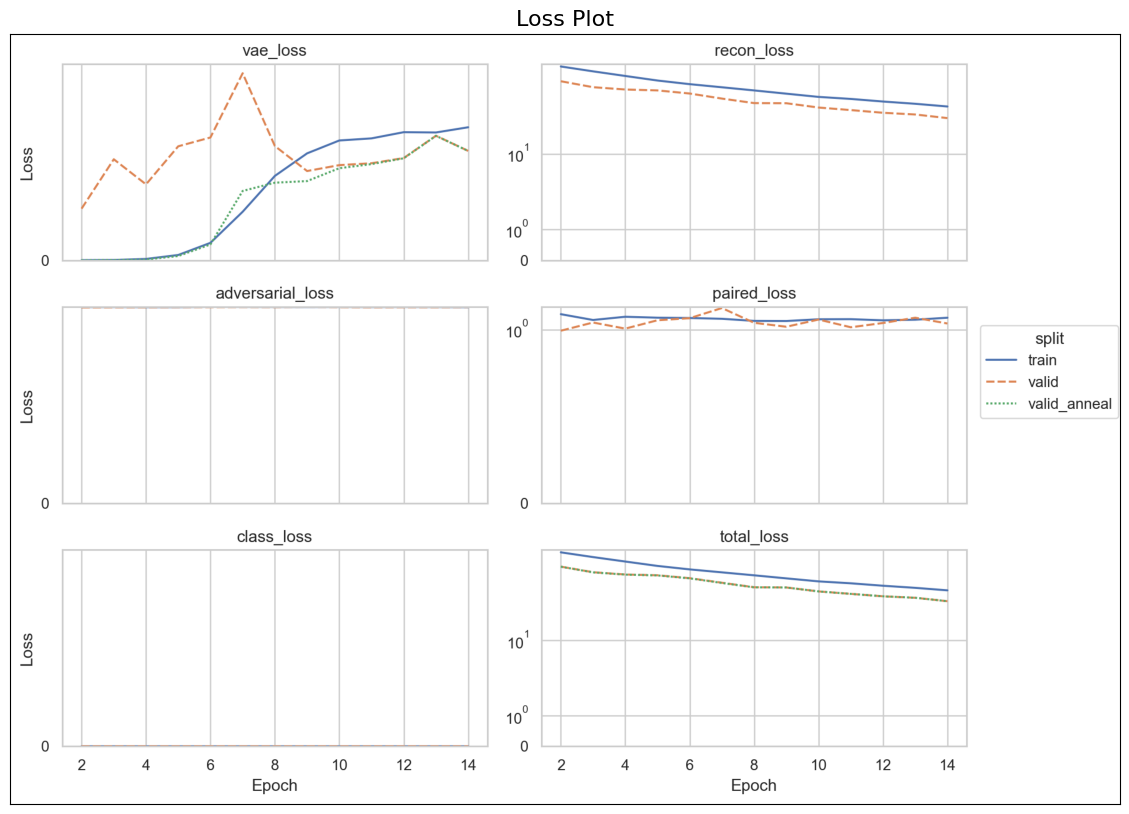

In [16]:
plt.figure(figsize=(15, 10))
loss_img = cv2.imread(loss_path)
loss_img = cv2.cvtColor(loss_img, cv2.COLOR_BGR2RGB)
plt.imshow(loss_img)
plt.title('Loss Plot', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()


#### Plot 2: Translation Plot

##### Here we show reconstructions of the C. Elegans embryos. The columns of the grid indicate from which timepoint the images was generated. We binned the timepoints in to quartiles. The first two rows show a sampled point from the latentspace of the `FROM` modality (here proteomics) and the `TO` modality (here images). Please refer to our publication for more details. The three bottom rows of the grid show example translations from the test dataset for each quartile. 

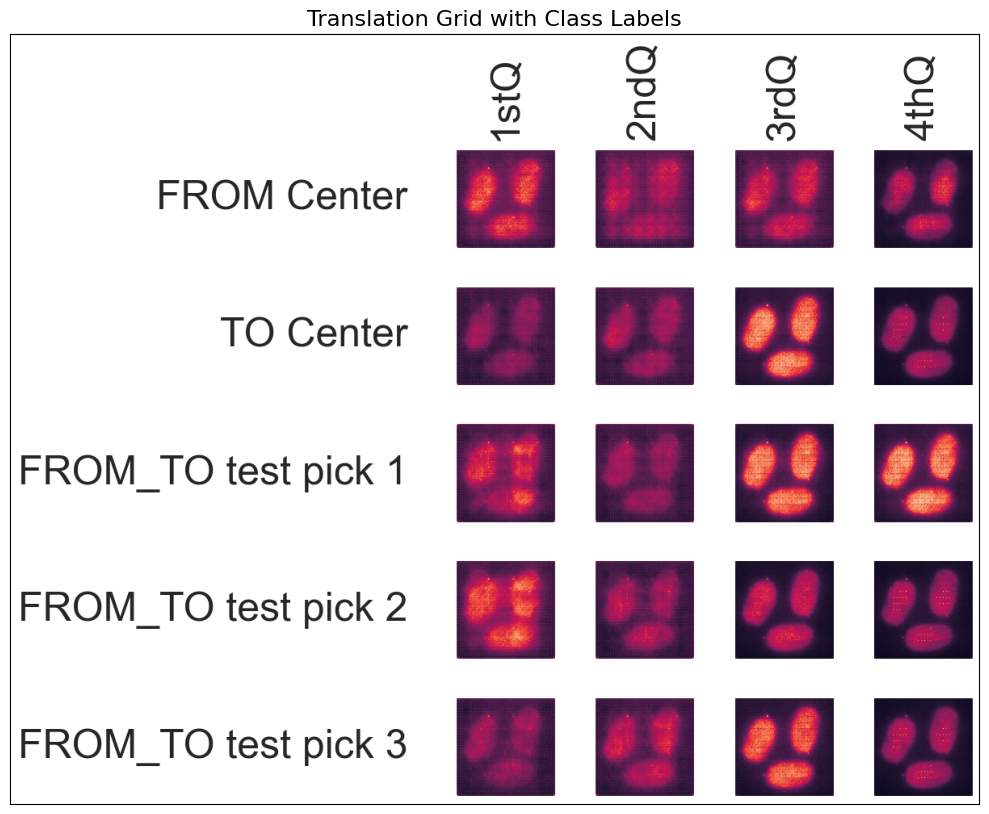

In [17]:
plt.figure(figsize=(15, 10))
translate_grid_img = cv2.imread(translate_grid_path)
translate_grid_img = cv2.cvtColor(translate_grid_img, cv2.COLOR_BGR2RGB)
plt.imshow(translate_grid_img)
plt.title('Translation Grid with Class Labels', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

#### Plot 3: 

##### Here we reduce the dimension of our latent space using a UMAP. We visualize the `FROM` (proteomics) latent space on the left and the `TO` (image data) latent space on the right. We color the datapoints according to the timepoint in embryogenesis. We see that the time information remains in the latent embedding.

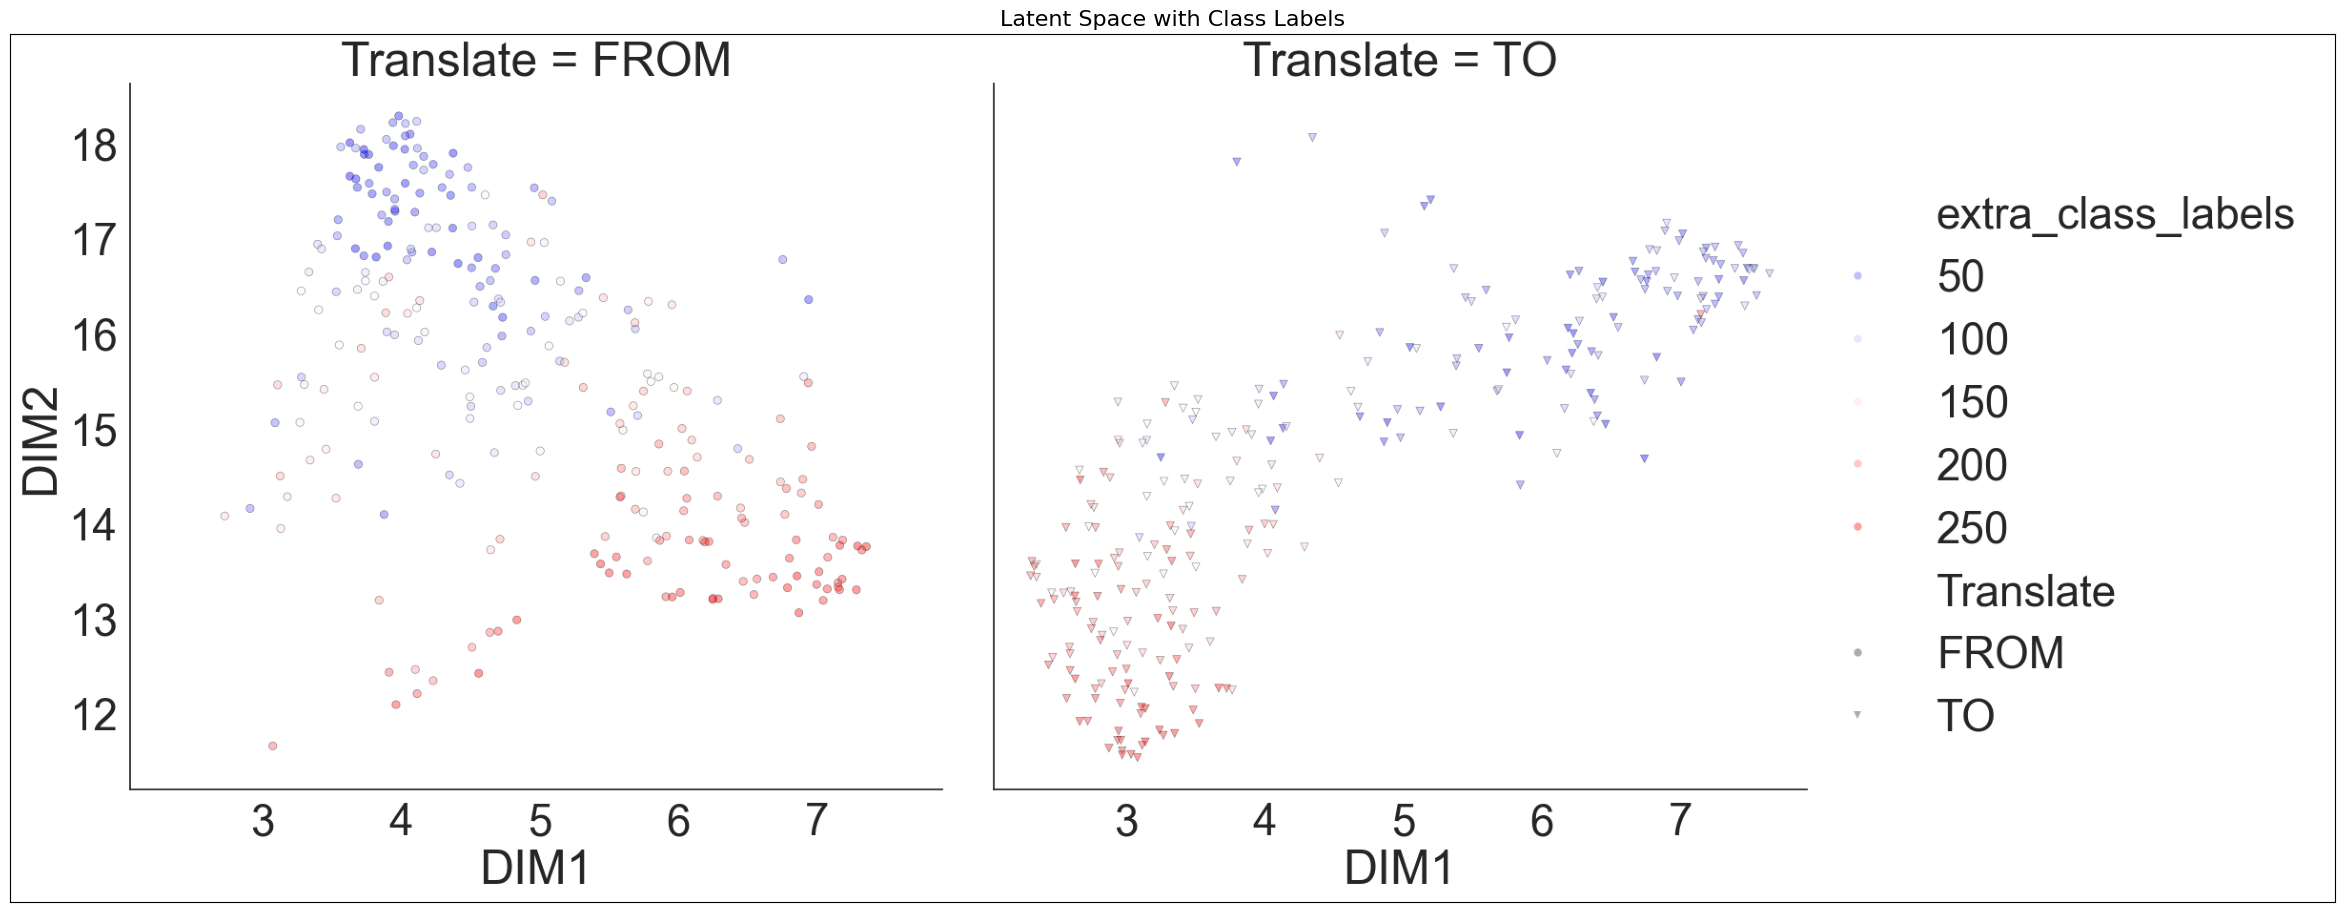

In [18]:
plt.figure(figsize=(30, 20))
latent_space_img = cv2.imread(latent_space_path)
latent_space_img = cv2.cvtColor(latent_space_img, cv2.COLOR_BGR2RGB)
plt.imshow(latent_space_img)
plt.title('Latent Space with Class Labels', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

### 5. Show how to customize the pipeline
##### This Tutorial should have given you an overview of the functionality of our `AUTOENCODIX`, without the hassle of downloading data or making customizations. However, for real-world use-cases you will likely need to make adjustments. This can be easily done by modifying the config file.

##### We have advanced Notebook Tutorials and extensive documentation that show how to build your own config with own data from scratch. Here, we want to show basic modifications. Let's say you want to:

##### - change the learning rate
##### - change the weighting of the different losses

##### We will overwrite these two parameters in the config and save the config under our new RUN_ID `my_getting_started`

In [19]:
MY_CFG = CFG.copy()
MY_CFG["LR_FIXED"] = 1e-4
MY_CFG["BETA"] = 0.1 # this weights the KL-divergence term in the loss function
with open("my_getting_started_config.yaml", "w") as f:
    yaml.dump(MY_CFG, f)

In [20]:
output_make_visualize = subprocess.run(["make", "visualize", "RUN_ID=my_getting_started"], 
                        capture_output=True, 
                        text=True)
print(output_make_visualize.stdout[-18:-1])


Done visualizing


#### Investigation custom results


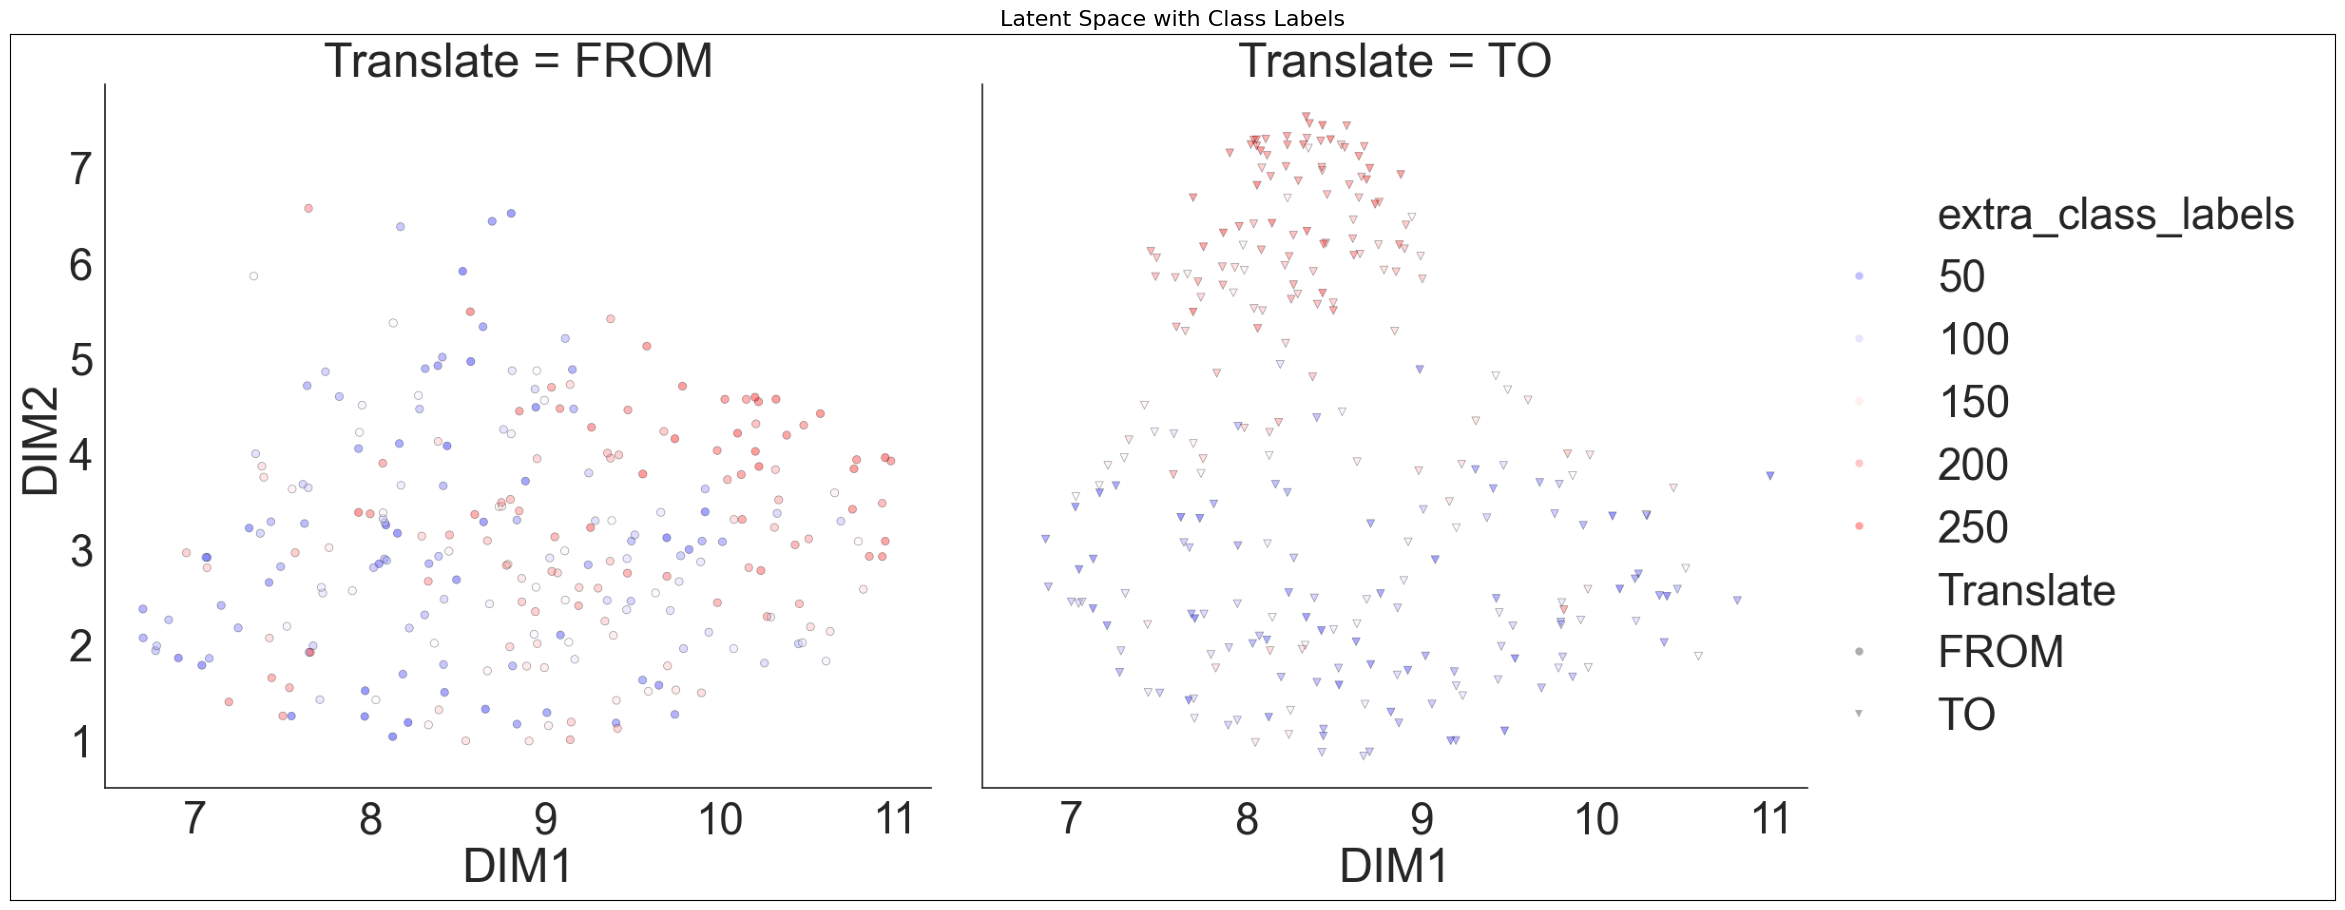

In [21]:
figure_base_path = os.path.join("reports/my_getting_started/figures")
latent_space_path = os.path.join(figure_base_path, "latent2D_Aligned_extra_class_labels.png")
latent_space_img = cv2.imread(latent_space_path)
latent_space_img = cv2.cvtColor(latent_space_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30, 20))
latent_space_img = cv2.imread(latent_space_path)
latent_space_img = cv2.cvtColor(latent_space_img, cv2.COLOR_BGR2RGB)
plt.imshow(latent_space_img)
plt.title('Latent Space with Class Labels', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

## References
```
Citation: Ma, X., Zhao, Z., Xiao, L. et al. A 4D single-cell protein atlas of transcription factors delineates spatiotemporal patterning during embryogenesis. Nat Methods 18, 893–902 (2021). https://doi.org/10.1038/s41592-021-01216-1
```